# Trp-cage WE Optimization
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/jdrusso/msm_we/HEAD?labpath=examples%2Foptimization.ipynb)

In [1]:
from msm_we import optimization as mo
import numpy as np
import matplotlib.pyplot as plt

## Load haMSM

In [2]:
import pickle

with open('data/pickled_model', 'rb') as inf:
    model = pickle.load(inf)

## Compute discrepancy, variance

In [3]:
steady_state_distribution = model.pSS
n_active_we_bins = 10

In [4]:
discrepancy, variance = mo.solve_discrepancy(
    tmatrix = model.Tmatrix,
    pi = steady_state_distribution,
    B = model.indTargets
)

[10/04/22 10:35:18] INFO     Computing pi matrix                                                 ]8;id=31857;file:///home/jd/msm_we/msm_we/optimization.py\optimization.py]8;;\:]8;id=304085;file:///home/jd/msm_we/msm_we/optimization.py#57\57]8;;\

### Visualize discrepancy and $\pi \cdot v$

[10/04/22 10:35:19] WARNING  Note that, if steady-state weighted ensemble data is being analyzed,    ]8;id=785257;file:///home/jd/msm_we/msm_we/msm_we.py\msm_we.py]8;;\:]8;id=249165;file:///home/jd/msm_we/msm_we/msm_we.py#7094\7094]8;;\
                             this is a 'pseudocommittor' and not a true committor as a result of                   
                             being constructed from a one-way ensemble.                                            

  0%|          | 0/5.0 [00:00<?, ?it/s]

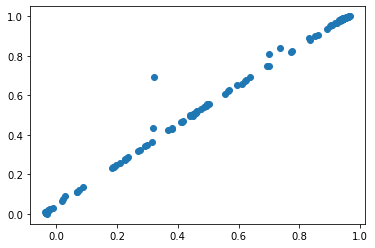

In [5]:
model.get_committor()
plt.scatter(discrepancy, model.q)

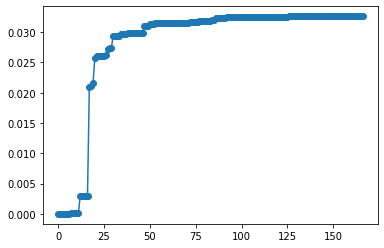

In [6]:
pi_v = steady_state_distribution * variance
pi_v_sort = np.argsort(discrepancy).squeeze()
cumsum = np.cumsum(pi_v[pi_v_sort])

plt.plot(cumsum, '-o')

## Compute WE bin assignments for each MSM microstate

This is a list with an element for each MSM microbin, which is the integer index of the WE bin it's assigned to.

In other words, `microstate_assignments[microbin_index] == WE bin index` of that microbin

If there are big jumps in our discrepancy function, then the uniform-width bins won't appropriately divide the space.

In [7]:
microstate_assignments = mo.get_uniform_mfpt_bins(
    variance, discrepancy, steady_state_distribution, n_active_we_bins
)
microstate_assignments

array([5, 6, 0, 6, 0, 0, 5, 0, 7, 0, 0, 0, 0, 5, 0, 0, 6, 6, 7, 6, 6, 7,
       0, 6, 7, 6, 0, 6, 7, 6, 0, 7, 0, 7, 0, 7, 7, 7, 7, 7, 7, 7, 0, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 7])

We can instead use the k-means clustered MFPT bins.

In [8]:
microstate_assignments = mo.get_clustered_mfpt_bins(
    variance, discrepancy, steady_state_distribution, n_active_we_bins
)
microstate_assignments

array([4., 2., 1., 2., 1., 1., 4., 5., 3., 1., 1., 1., 1., 4., 1., 1., 2.,
       7., 6., 7., 2., 6., 1., 2., 3., 7., 5., 2., 6., 2., 1., 3., 5., 3.,
       5., 6., 3., 6., 3., 0., 0., 6., 1., 3., 6., 0., 6., 6., 3., 3., 3.,
       6., 3., 3., 6., 0., 6., 6., 0., 6., 0., 3., 6., 3., 6., 0., 0., 6.,
       0., 6., 3., 0., 3., 0., 0., 0., 0., 0., 0., 3., 6., 6., 6., 0., 6.,
       0., 0., 0., 6., 6., 0., 6., 0., 6., 6., 6., 6., 6., 0., 6., 0., 6.,
       0., 0., 0., 0., 0., 0., 0., 0., 6., 0., 6., 6., 0., 0., 6., 0., 0.,
       0., 0., 0., 0., 0., 6., 0., 0., 6., 6., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 5., 0.])

In [9]:
# Add entries for the basis/target states, since MSM-WE sets those as the last two clusters
microstate_assignments = np.concatenate(
    [microstate_assignments, [n_active_we_bins - 2, n_active_we_bins - 1]]
)
microstate_assignments

array([4., 2., 1., 2., 1., 1., 4., 5., 3., 1., 1., 1., 1., 4., 1., 1., 2.,
       7., 6., 7., 2., 6., 1., 2., 3., 7., 5., 2., 6., 2., 1., 3., 5., 3.,
       5., 6., 3., 6., 3., 0., 0., 6., 1., 3., 6., 0., 6., 6., 3., 3., 3.,
       6., 3., 3., 6., 0., 6., 6., 0., 6., 0., 3., 6., 3., 6., 0., 0., 6.,
       0., 6., 3., 0., 3., 0., 0., 0., 0., 0., 0., 3., 6., 6., 6., 0., 6.,
       0., 0., 0., 6., 6., 0., 6., 0., 6., 6., 6., 6., 6., 0., 6., 0., 6.,
       0., 0., 0., 0., 0., 0., 0., 0., 6., 0., 6., 6., 0., 0., 6., 0., 0.,
       0., 0., 0., 0., 0., 6., 0., 0., 6., 6., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 5., 0., 8., 9.])

## Create `OptimizedBinMapper`

In [10]:
base_mapper = model.clusters.bin_mapper
n_pcoord_dims=1

In [11]:
# Create the new bin mapper for WESTPA
we_bin_mapper = mo.OptimizedBinMapper(
    n_active_we_bins,
    # In case the pcoord is extended, this is the original pcoord dimensionality
    n_pcoord_dims,
    # If the pcoord was extended, pcoord boundaries are in the original pcoord space
    model.basis_pcoord_bounds,
    model.target_pcoord_bounds,
    # The original, non-Optimized BinMapper that WESTPA was run with.
    #   Used for stratified clustering
    base_mapper,
    microstate_assignments,
    model.clusters
)

we_bin_mapper

[10/04/22 10:35:19] INFO     Multiple arguments provided to binmapper initializer, creating new ]8;id=941945;file:///home/jd/msm_we/msm_we/optimization.py\optimization.py]8;;\:]8;id=207928;file:///home/jd/msm_we/msm_we/optimization.py#177\177]8;;\
                             object                                                                                

                    INFO     Clusterer has 167 total clusters (include 1 for basis and 1 for    ]8;id=204843;file:///home/jd/msm_we/msm_we/optimization.py\optimization.py]8;;\:]8;id=171963;file:///home/jd/msm_we/msm_we/optimization.py#237\237]8;;\
                             target)                                                                               

<OptimizedBinMapper at 0x7f71f3a89790 with 10 bins>

In [12]:
we_bin_mapper.microstate_mapper

array([4., 2., 1., 2., 1., 1., 4., 5., 3., 1., 1., 1., 1., 4., 1., 1., 2.,
       7., 6., 7., 2., 6., 1., 2., 3., 7., 5., 2., 6., 2., 1., 3., 5., 3.,
       5., 6., 3., 6., 3., 0., 0., 6., 1., 3., 6., 0., 6., 6., 3., 3., 3.,
       6., 3., 3., 6., 0., 6., 6., 0., 6., 0., 3., 6., 3., 6., 0., 0., 6.,
       0., 6., 3., 0., 3., 0., 0., 0., 0., 0., 0., 3., 6., 6., 6., 0., 6.,
       0., 0., 0., 6., 6., 0., 6., 0., 6., 6., 6., 6., 6., 0., 6., 0., 6.,
       0., 0., 0., 0., 0., 0., 0., 0., 6., 0., 6., 6., 0., 0., 6., 0., 0.,
       0., 0., 0., 0., 0., 6., 0., 0., 6., 6., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 5., 0., 8., 9.])